In [1]:
# added this to get tab-complete working on theta
%config Completer.use_jedi = False
import os,sys,json,time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import multiprocessing as mp

In [2]:
base_path = '/lus/theta-fs0/logs/pythonlogging/module_usage/'
check_for_modules = ['tensorflow','torch','horovod','pandas','matplotlib','h5py','sklearn','numpy','scipy','balsam']

In [3]:
#dataset = pd.read_csv('data_processing/output2.csv.gz',compression='gzip')
dataset = pd.read_csv('2021-01.pysnooper_dataset2.csv',compression='gzip')

In [4]:
dataset['modules'] = dataset['modules'].str.replace("'",'"').apply(json.loads)
dataset['timestamp'] = pd.to_datetime(dataset['timestamp'])

In [5]:
dataset

,hostname,hpcname,cooley,thetagpu,filename,source,timestamp,modules,thetaknl,source_id
0,thetagpu18,thetagpu,0,1,/lus/theta-fs0/logs/pythonlogging/module_usage...,/lus/theta-fs0/software/thetagpu/conda/pt_mast...,2021-01-20 15:29:06.400975,"[conda, ruamel_yaml]",NaN,26
1,thetagpu16,thetagpu,0,1,/lus/theta-fs0/logs/pythonlogging/module_usage...,/lus/theta-fs0/software/thetagpu/conda/tf_mast...,2021-01-20 07:48:12.674090,"[PIL, asyncio, typing_extensions, tree, crypto...",NaN,15
2,thetalogin3,thetaknl,0,0,/lus/theta-fs0/logs/pythonlogging/module_usage...,/lus/theta-fs0/software/datascience/conda/mini...,2021-01-20 20:19:50.468728,"[conda, ruamel_yaml, toolz, cytoolz]",1.0,11
3,thetalogin4,thetaknl,0,0,/lus/theta-fs0/logs/pythonlogging/module_usage...,/lus/theta-fs0/software/datascience/conda/mini...,2021-01-20 15:35:15.509209,"[conda, ruamel_yaml, toolz, cytoolz]",1.0,11
4,thetagpusn1,thetagpu,0,1,/lus/theta-fs0/logs/pythonlogging/module_usage...,/lus/theta-fs0/software/thetagpu/conda/pt_mast...,2021-01-20 22:47:46.576150,"[tqdm, ftplib, cgi, conda, chardet, netrc, rua...",NaN,26
...,...,...,...,...,...,...,...,...,...,...
9916026,nid03519,thetaknl,0,0,/lus/theta-fs0/logs/pythonlogging/module_usage...,/lus/theta-fs0/software/datascience/conda/mini...,2021-01-17 13:13:47.248399,[pandas],1.0,11
9916027,nid00451,thetaknl,0,0,/lus/theta-fs0/logs/pythonlogging/module_usage...,/lus/theta-fs0/software/datascience/conda/mini...,2021-01-17 13:00:29.551288,[pandas],1.0,11
9916028,nid00454,thetaknl,0,0,/lus/theta-fs0/logs/pythonlogging/module_usage...,/lus/theta-fs0/software/datascience/conda/mini...,2021-01-17 13:00:36.995374,[pandas],1.0,11
9916029,nid02441,thetaknl,0,0,/lus/theta-fs0/logs/pythonlogging/module_usage...,/lus/theta-fs0/software/datascience/conda/mini...,2021-01-17 13:00:36.951883,[pandas],1.0,11


In [41]:
dataset.groupby(['source_id','source']).size().reset_index().rename(columns={0:'count'})

,source_id,source,count
0,0,/lus/theta-fs0/projects/connectomics_aesp/deep...,64
1,1,/lus/theta-fs0/software/datascience/conda/mini...,13
2,2,/lus/theta-fs0/software/thetagpu/conda/tf_mast...,3394
3,3,/lus/theta-fs0/software/thetagpu/conda/tf_mast...,620
4,4,/lus/theta-fs0/software/interpreters/python/3....,384
5,5,/lus/theta-fs0/projects/ExaLearn/Ganesh/softwa...,13
6,6,/lus/theta-fs0/software/datascience/conda/mini...,408
7,7,/gpfs/mira-home/fsimini/.conda/envs/tgpupt/bin...,4
8,8,/lus/theta-fs0/projects/DLHMC/thetaGPU/conda/b...,1
9,9,/gpfs/mira-home/mgori88/.conda/envs/MBDtest1/b...,1


In [59]:
def plot_module_usage_by_day(dataset,module_list,colors=None):
    fig,ax = plt.subplots(1,figsize=(12,8),dpi=80)
    data = []
    for module in module_list:
        print(module)
        module_entries = dataset[dataset['modules'].apply(lambda x: module in x)]
        use_per_day = dataset['timestamp'].groupby(module_entries['timestamp'].dt.day).count()
        use_per_day = use_per_day.rename(module)
        data.append(use_per_day)
    data = pd.concat(data,axis=1)
    data.plot(kind='bar',ax=ax,color=colors)
    ax.set_xlabel('day')
    ax.set_yscale('log')
    ax.legend()
#     ax.set_xlim(1,31)
#     days = [ x for x in range(1,32) ]
#     ax.set_xticks(days)
#     ax.set_xticklabels(days)
    min_date = dataset['timestamp'].min()
    max_date = dataset['timestamp'].max()
    ax.set_title('Covers ' + str(min_date.date()) + ' to ' + str(max_date.date()))

def plot_source(dataset):
    fig,ax = plt.subplots(1,figsize=(12,8),dpi=80)
    newdata = dataset.groupby(['source_id','source']).size().reset_index().rename(columns={0:'count'})
    newdata[['source_id','count']].plot(x='source_id',y='count',kind='bar',ax=ax,logy=True)
    #dataset.groupby(dataset['source_id'])['timestamp'].count().plot(kind='bar',ax=ax,logy=True)
    ax.set_xlabel('python source module ID')
    min_date = dataset['timestamp'].min()
    max_date = dataset['timestamp'].max()
    ax.set_title('Covers ' + str(min_date.date()) + ' to ' + str(max_date.date()))
    pd.options.display.max_colwidth = 500
    print(newdata[['source_id','source']])

def plot_machine_by_day(dataset,machine_list,colors=None):
    fig,ax = plt.subplots(1,figsize=(12,8),dpi=80)
    data = []
    for machine in machine_list:
        machine_entries = dataset[dataset[machine] == 1]
        use_per_day = dataset['timestamp'].groupby(machine_entries['timestamp'].dt.day).count()
        use_per_day = use_per_day.rename(machine)
        data.append(use_per_day)
    data = pd.concat(data,axis=1)
    data.plot(kind='line',ax=ax,color=colors)
    ax.set_xlabel('day')
    ax.set_yscale('log')
    ax.legend()
    min_date = dataset['timestamp'].min()
    max_date = dataset['timestamp'].max()
    ax.set_title('Covers ' + str(min_date.date()) + ' to ' + str(max_date.date()))

def plot_most_used_modules(dataset,top_n=10):
    
    mods = dataset['modules']
    mod_dict = {}
    for modlist in mods:
        for entry in modlist:
            if entry in mod_dict.keys():
                mod_dict[entry] += 1
            else:
                mod_dict[entry] = 1
    
    ds = pd.DataFrame({'module':mod_dict.keys(),'occurance':mod_dict.values()})
    
    ds = ds.sort_values('occurance',ascending=False)
    
    fig,ax = plt.subplots(1,figsize=(12,8),dpi=80)
    ds[0:top_n].plot(kind='bar',ax=ax)
    ax.set_xlabel(f'top {top_n} modules')
    ax.set_ylabel('number of uses')
    ax.set_yscale('log')
    ax.set_xticklabels(ds['module'][0:top_n])
    
    min_date = dataset['timestamp'].min()
    max_date = dataset['timestamp'].max()
    ax.set_title('Covers ' + str(min_date.date()) + ' to ' + str(max_date.date()))
    
    return ds
    
    

balsam
tensorflow
torch
horovod


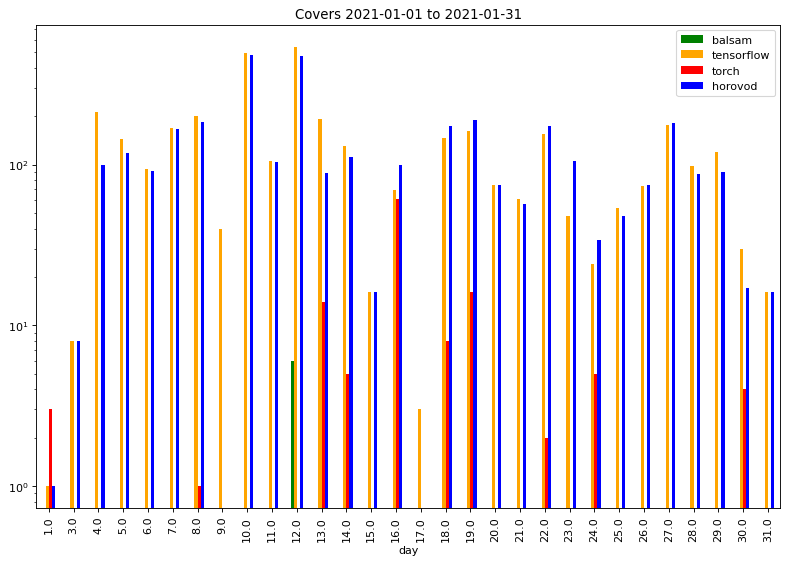

In [32]:
plot_module_usage_by_day(dataset,['balsam','tensorflow','torch','horovod'],
                         {'balsam':'green','tensorflow':'orange','torch':'red','horovod':'blue'})

    source_id                                                                             source
0           0   /lus/theta-fs0/projects/connectomics_aesp/deephyper-runs/run-gpu/venv/bin/python
1           1            /lus/theta-fs0/software/datascience/conda/miniconda3/2020-07/bin/python
2           2     /lus/theta-fs0/software/thetagpu/conda/tf_master/2021-01-08/mconda3/bin/python
3           3     /lus/theta-fs0/software/thetagpu/conda/tf_master/2020-12-17/mconda3/bin/python
4           4        /lus/theta-fs0/software/interpreters/python/3.6/intel/2019.3.075/bin/python
5           5  /lus/theta-fs0/projects/ExaLearn/Ganesh/software/THETAGPU_TF_CONDA_ENV/bin/python
6           6            /lus/theta-fs0/software/datascience/conda/miniconda3/2020-12/bin/python
7           7                              /gpfs/mira-home/fsimini/.conda/envs/tgpupt/bin/python
8           8                            /lus/theta-fs0/projects/DLHMC/thetaGPU/conda/bin/python
9           9                 

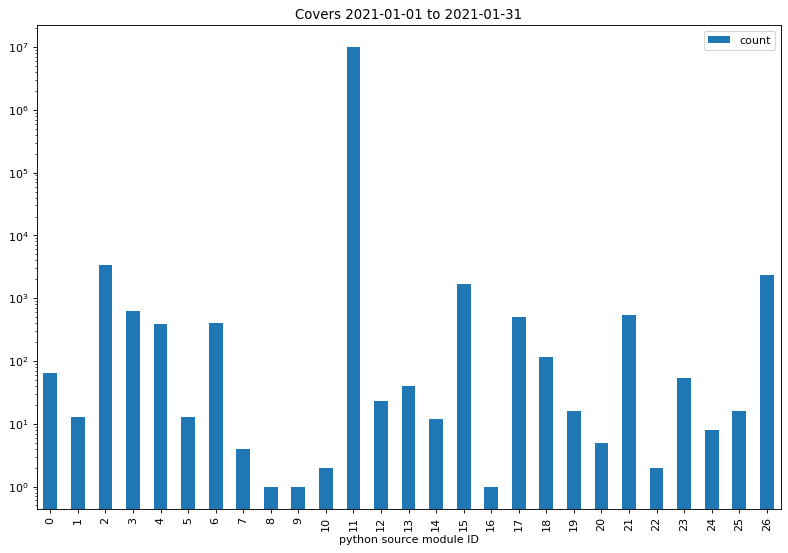

In [54]:
plot_source(dataset)

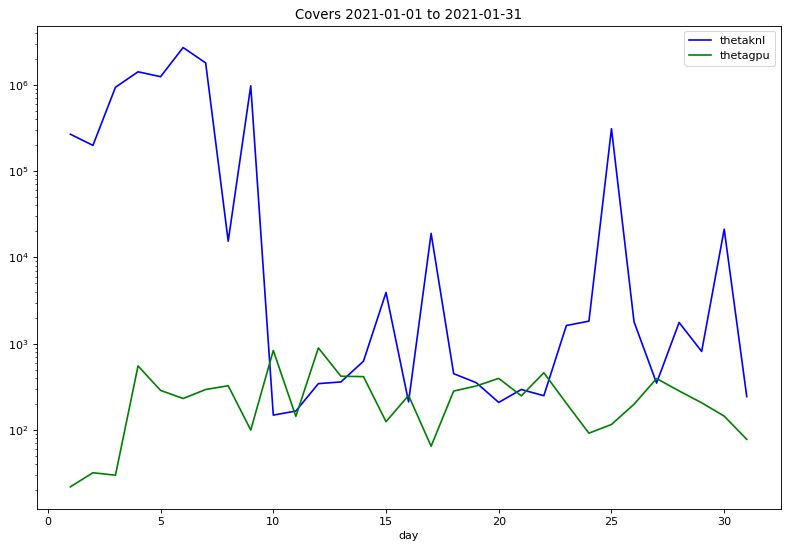

In [60]:
plot_machine_by_day(dataset,['thetaknl','thetagpu'],{'thetaknl':'blue','thetagpu':'green'})

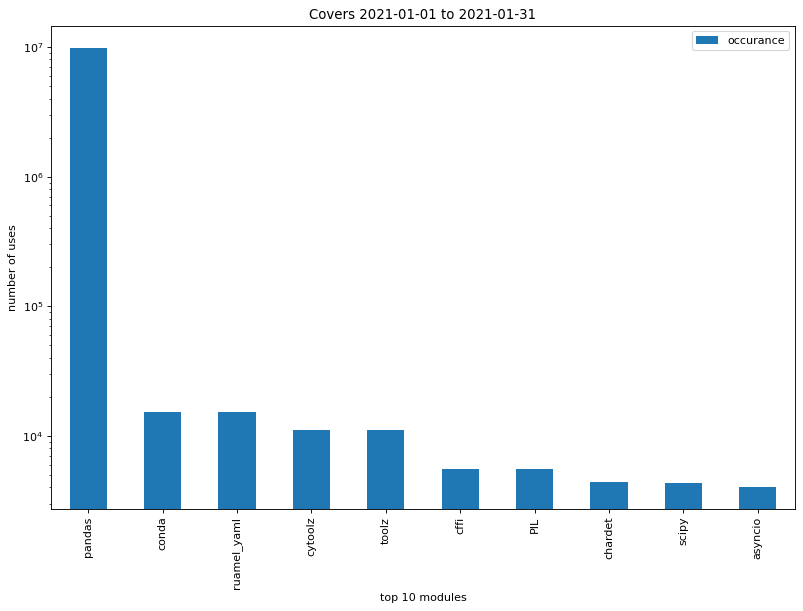

In [56]:
x = plot_most_used_modules(dataset)

(array([4.25000e+02, 6.40000e+01, 4.20000e+01, 6.00000e+00, 9.00000e+00,
        6.00000e+00, 5.39000e+02, 1.22300e+03, 2.00000e+02, 9.50000e+01,
        4.26000e+02, 3.60000e+01, 8.19900e+03, 1.63950e+04, 0.00000e+00,
        2.00000e+01, 1.40000e+01, 5.30000e+01, 7.70000e+01, 1.18000e+02,
        2.52000e+02, 3.48000e+02, 1.64080e+04, 1.00000e+01, 1.47353e+05,
        2.50000e+01, 3.30000e+01, 6.00000e+00, 6.00000e+00, 4.70000e+01,
        7.00000e+01, 1.35000e+02, 8.33500e+03, 1.40000e+01, 8.20700e+03,
        8.22000e+03, 6.00000e+00, 1.10000e+01, 6.00000e+00, 1.20000e+01,
        5.30000e+01, 1.48000e+02, 2.46000e+02, 7.27000e+02, 6.70000e+01,
        5.30000e+01, 8.60000e+01, 6.00000e+00, 2.30000e+01, 6.00000e+00,
        6.00000e+00, 6.00000e+00, 2.60000e+01, 1.12000e+02, 1.81000e+02,
        2.00000e+02, 1.17000e+02, 3.70000e+01, 3.40000e+01, 5.20000e+01,
        9.00000e+00, 9.00000e+00, 2.10000e+01, 2.70000e+01, 6.60000e+01,
        2.60000e+01, 2.70000e+01, 3.00000e+01, 2.70

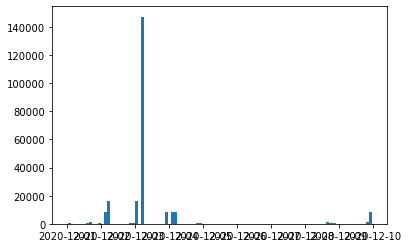

In [148]:
plt.hist(dataset['timestamp'],bins=100)

[0, 1, 2, 3]
[0, 1, 2, 3, 0, 1, 2]
